# **TTI109 - Estatística**
# **Aula 12 - Distribuição Normal de Probabilidade 02**

Nessa aula vamos aprender a:

* Determinar o escore-z relativo à uma certa probabilidade de ocorrência de uma variável aleatória normalmente distribuída;
* Calcular o valor da variável aleatória a partir do seu escore-z correspondente;
* Calcular média e desvio padrão de distribuições amostrais de médias;
* Aplicar o Teorema do Limite Central (TLC).

In [65]:
# Biblioteca
from scipy.stats import norm

## **Encontrando escores-z**

Dada uma área (uma probabilidade), qual o correspondente escore-z relativo à uma distribuição normal padrão? O método `ppf()` (*Percent Point Function*) da classe `stats.norm` resolve esse problema.

*   Determine o escore-*z* que tenha 96,16% da área de distribuição à sua direita.
*   Determine o escore-*z* para o qual 95% da área de distribuição esteja entre *–z* e *z*.


In [66]:
# Construindo a distribuição normal padrão
mu, std = 0, 1
normpad = norm(mu, std)

In [67]:
# Escore-z que tenha 96,16% da área de distribuição à sua direita
z1 = normpad.ppf(1-0.9616)
print(f'z1 = {z1:.3f}')
print(f'Conferindo... Área à direita = {normpad.sf(z1)*100:.2f}%')

z1 = -1.770
Conferindo... Área à direita = 96.16%


In [68]:
# Escore-z para o qual 95% da área de distribuição esteja entre –z e z
z2 = normpad.ppf(0.05)
print(f'z2 = {z2:.3f}')
print(f'Conferindo... Área à esquerda de z = {z2:.3f} é {normpad.cdf(z2)*100:.2f}%')
print(f'Conferindo... Área à direita de z = {-z2:.3f} é {normpad.sf(-z2)*100:.2f}%')

z2 = -1.645
Conferindo... Área à esquerda de z = -1.645 é 5.00%
Conferindo... Área à direita de z = 1.645 é 5.00%


##**Exercício 01**

Um pesquisador testa as distâncias de frenagem de diversos carros. A distância de frenagem de 60 milhas por hora até uma parada completa em pista seca é medida em pés. As distâncias de frenagem de uma
amostra de carros são normalmente distribuídas, com média de 129 pés e desvio padrão de 5,18 pés.

Qual é a maior distância de frenagem que um desses carros poderia ter e ainda estar no grupo do 1% mais baixo? (*Adaptado de: Consumer Reports*)

In [69]:
# Construindo a distribuição normal das distâncias de frenagem
mu, std = 129, 5.18
frenagem = norm(mu, std)

In [70]:
# Distância máxima com 1% da área de distribuição à sua esquerda
dist = frenagem.ppf(0.01)
print(f'Distância máxima = {dist:.2f} pés')
print(f'Conferindo... Área à esquerda = {frenagem.cdf(dist)*100:.2f}%')

Distância máxima = 116.95 pés
Conferindo... Área à esquerda = 1.00%


##**Exercício 02**

O tempo de trabalho dos funcionários em uma empresa é normalmente distribuído, com média de 11,2 anos e desvio padrão de 2,1 anos.

Em uma redução de quadro, os 10% com menos tempo na empresa são demitidos. Qual é o tempo máximo que um funcionário pode ter trabalhado na empresa e ainda assim ser cortado?

In [71]:
# Construindo a distribuição normal dos tempos de empresa
mu, std = 11.2, 2.1
tempos = norm(mu, std)

In [72]:
# Tempo de empresa máximo com 10% da área de distribuição à sua esquerda
tempo = tempos.ppf(0.1)
print(f'Tempo máximo = {tempo:.2f} anos')
print(f'Conferindo... Área à esquerda = {tempos.cdf(tempo)*100:.2f}%')

Tempo máximo = 8.51 anos
Conferindo... Área à esquerda = 10.00%


## **Distribuições amostrais**

##**Exercício 03**

Os valores populacionais $\{1, 3, 5, 7\}$ são equiprováveis. Esses valores são escritos em pedaços de papel e colocados em uma caixa. Então, selecionam-se dois pedaços de papel aleatoriamente, com reposição.

**(a)** Liste todas as amostras possíveis de tamanho $𝑛 = 2$ e calcule suas respectivas médias.




In [73]:
# Bibliotecas
import itertools as it
import pandas as pd

In [74]:
## Item (a)
# Chave para permutação
chave = [1, 3, 5, 7]

# Geração de todas as amostras possíveis de tamanho 2
amostras_2a2 = list(it.product(chave, repeat=2))

# Criação de tabela com possíveis amostras, acompanhadas de suas médias
amostras = pd.DataFrame({'Amostras': amostras_2a2,
                        'Média': [(x1+x2)/2 for (x1, x2) in amostras_2a2]})
display(amostras)

,Amostras,Média
0,"(1, 1)",1.0
1,"(1, 3)",2.0
2,"(1, 5)",3.0
3,"(1, 7)",4.0
4,"(3, 1)",2.0
5,"(3, 3)",3.0
6,"(3, 5)",4.0
7,"(3, 7)",5.0
8,"(5, 1)",3.0
9,"(5, 3)",4.0


**(b)** Encontre a média, a variância e o desvio
padrão das médias amostrais.

In [75]:
## Item (b)
# Determinação da frequência de cada média
contagem = amostras['Média'].value_counts().sort_index()
print(contagem)

1.0    1
2.0    2
3.0    3
4.0    4
5.0    3
6.0    2
7.0    1
Name: Média, dtype: int64


In [76]:
# Criação de tabela com as possíveis médias
dist_prob = pd.DataFrame({'Médias': contagem.index,
                         'Frequência': contagem.values})
display(dist_prob)

,Médias,Frequência
0,1.0,1
1,2.0,2
2,3.0,3
3,4.0,4
4,5.0,3
5,6.0,2
6,7.0,1


In [77]:
# Cálculo das probabilidades de ocorrência das médias
dist_prob['Probabilidade'] = dist_prob['Frequência'] / dist_prob['Frequência'].sum()
display(dist_prob)

,Médias,Frequência,Probabilidade
0,1.0,1,0.0625
1,2.0,2,0.1250
2,3.0,3,0.1875
3,4.0,4,0.2500
4,5.0,3,0.1875
5,6.0,2,0.1250
6,7.0,1,0.0625


In [78]:
# Cálculo da média das médias amostrais
media_amostras = (dist_prob['Médias']*dist_prob['Probabilidade']).sum()
print(f'Média das médias amostrais = {media_amostras:.2f}')

Média das médias amostrais = 4.00


In [79]:
# Cálculo da variância das médias amostrais
var_amostras = (dist_prob['Médias']**2*dist_prob['Probabilidade']).sum() - media_amostras**2
print(f'Variância das médias amostrais = {var_amostras:.2f}')

Variância das médias amostrais = 2.50


In [80]:
# Cálculo do desvio padrão das médias amostrais
std_amostras = var_amostras**(1/2)
print(f'Desvio padrão das médias amostrais = {std_amostras:.2f}')

Desvio padrão das médias amostrais = 1.58


**(c)** Compare seus resultados com a média $\mu = 4$,
variância $\sigma^2 = 5$, e desvio padrão $\sigma \approx 2,236$ da população.

In [81]:
## Item (c)
mu, std = 4, 5**(1/2)
n_amostras = 2
print('De acordo com a teoria das distribuições amostrais:')
print(f'A média mu_x = {media_amostras:.2f} deve ser igual a média populacional mu = {mu}.')
print(f'O desvio padrão sigma_x = {std_amostras:.2f} deve ser igual a sigma/raiz(n) = {std/(n_amostras**(1/2)):.2f}')

De acordo com a teoria das distribuições amostrais:
A média mu_x = 4.00 deve ser igual a média populacional mu = 4.
O desvio padrão sigma_x = 1.58 deve ser igual a sigma/raiz(n) = 1.58


## **Probabilidades e o TLC**

##**Exercício 04**

O gasto médio com alojamento e refeição, por ano, em faculdades de quatro anos é de US\$ 9.126,00. Você seleciona aleatoriamente 9 dessas faculdades. Qual é a probabilidade de que a média de gastos com alojamento e refeição seja menor que US\$ 9.400,00?

Suponha que os gastos com alojamento e refeição sejam normalmente distribuídos, com desvio padrão de US$ 1.500,00 (*Adaptado de: National Center for
Education Statistics*).

In [82]:
# Média e desvio padrão populacionais
mu, std = 9126, 1500

In [83]:
# Média e desvio padrão amostrais
n = 9
mu_x, std_x = mu, std/(n**(1/2))

In [84]:
# Geração da distribuição normal amostral (TLC)
gastos = norm(mu_x, std_x)

In [85]:
# Cálculo da probabilidade
prob = gastos.cdf(9400)
print(f'A probabilidade de que os gastos sejam inferiores a US$ 94k é de {prob*100:.2f}%.')

A probabilidade de que os gastos sejam inferiores a US$ 94k é de 70.82%.


##**Exercício 05**

A dívida média no cartão de crédito mantida por universitários é normalmente distribuída, com média de US\$ 3.173,00 e desvio padrão de
US\$ 1.120,00 (*Adaptado de: Sallie Mae*).

**(a)** Qual é a probabilidade de que um universitário selecionado aleatoriamente,
que possui um cartão de crédito, tenha uma divida menor
que US\$ 2.700?

In [86]:
'''Nesse item, devemos calcular a probabilidade associada a um determinado
valor da variável aleatória dívida no cartão de crédito.'''
# Geração da distribuição normal da população
mu, std = 3173, 1120
divida_pop = norm(mu, std)

In [87]:
# Cálculo da probabilidade
prob1 = divida_pop.cdf(2700)
print(f'P(dívida <= 2700.00) = {prob1*100:.2f}%.')

P(dívida <= 2700.00) = 33.64%.


**(b)** Você seleciona aleatoriamente 25 universitários que possuem cartão
de crédito. Qual é a probabilidade de que a média dessas dívidas
médias seja menor que US\$ 2.700?

In [88]:
'''Nesse item, devemos calcular uma probabilidade associada a uma
média amostral.'''
# Geração da distribuição das médias amostrais
n = 25
mu_x, std_x = mu, std/(n**(1/2))
divida_amostra = norm(mu_x, std_x)

In [89]:
# Cálculo da probabilidade
prob2 = divida_amostra.cdf(2700)
print(f'P(dívida média <= 2700.00) = {prob2*100:.2f}%.')

P(dívida média <= 2700.00) = 1.74%.


## **Estudo de Caso - Teorema do Limite Central**

*Adaptado de:* https://statsthinking21.github.io/statsthinking21-python/06-Sampling.html

NHANES é a Pesquisa Nacional de Exame de Saúde e Nutrição (*National Health and Nutrition Examination Survey*), administrada pelos Centros de Controle de Doenças dos EUA.

Todos os anos, o estudo examina uma amostra representativa de cerca de 5.000 indivíduos de todos os Estados Unidos, utilizando uma ampla gama de pesquisas, medições fisiológicas e testes laboratoriais. Esses dados são úteis para muitos propósitos.

Aqui, nosso interesse é usar parte desses dados para exemplificar o Teorema do Limite Central.

In [90]:
# Instalação do pacote de dados
!pip install nhanes

Agora que os dados estão disponíveis para análise, vamos focar nossa atenção aos indivíduos adultos. Para isso, vamos selecionar todas as linhas nas quais a coluna `'AgeInYearsAtScreening'` tem registro superior à 17.

Nosso estudo do TLC vai se concentrar na coluna `'StandingHeightCm'` que renomearemos para `'Height'`. Essa coluna registra a altura dos indivíduos em centímetros. Vamos também extrair todas as linhas nas quais essa coluna não possui registro (valores NaN).

In [91]:
from nhanes.load import load_NHANES_data
nhanes_data = load_NHANES_data()
adult_nhanes_data = nhanes_data.query('AgeInYearsAtScreening > 17')
adult_nhanes_data = adult_nhanes_data.dropna(subset=['StandingHeightCm']).rename(columns={'StandingHeightCm': 'Height'})

Agora vamos retirar repetidamente amostras de 50 indivíduos do conjunto de dados, calcular a média das alturas e armazenar os valores resultantes.

In [92]:
# Faremos 5000 amostragens com 50 indivíduos cada, com reposição
tamanho_amostra = 50
num_amostragens = 5000

# Construindo um DataFrame para armazenar as médias das alturas de cada amostragem
resultados = pd.DataFrame({'média': np.zeros(num_amostragens)})

# Executando as 5000 amostragens
for amostragem in range(num_amostragens):
    amostra = adult_nhanes_data.sample(tamanho_amostra)
    resultados.loc[amostragem, 'média'] = amostra['Height'].mean()

# Inspecionando os resultados
display(resultados)

,média
0,167.212
1,168.500
2,166.522
3,164.920
4,167.782
...,...
4995,165.642
4996,165.834
4997,168.106
4998,166.264


Agora vamos representar graficamente a distribuição amostral. Também sobreporemos a distribuição amostral da média prevista com base na média e desvio padrão populacionais, com o intuito de mostrar que nossa representação descreve adequadamente a distribuição amostral real. Também colocaremos uma linha vertical na média da população.

In [93]:
# Bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

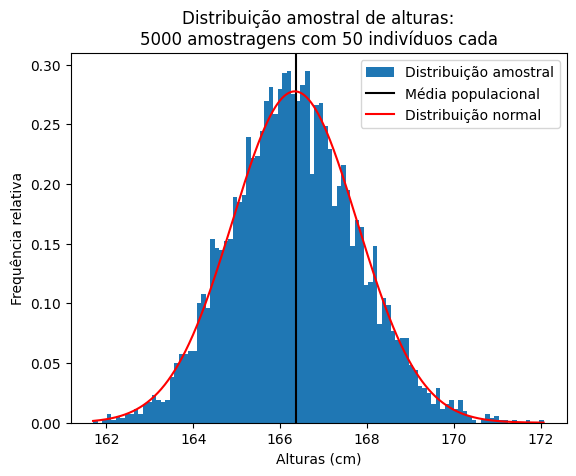

In [94]:
# Distribuição amostral
hist = plt.hist(resultados['média'], 100, density=True, label='Distribuição amostral')
'''NOTA: hist[0] contém todos os dados do histograma. Vamos usar o valor máximo
desses dados (frequências) para determinar o comprimento da linha vertical
que demarcará a média populacional.'''

# Mostrando a média populacional
plt.axvline(x=adult_nhanes_data['Height'].mean(), ymax=1, color='k', label='Média populacional')

# Distribuição normal com média e desvio padrão iguais aos da distribuição amostral
hist_bin_min = np.min(hist[1])
hist_bin_max = np.max(hist[1])
passo = 0.01
valores_altura = np.arange(hist_bin_min, hist_bin_max, passo)
dist_norm = norm.pdf(valores_altura,
                     loc=resultados['média'].mean(),
                     scale=resultados['média'].std())
plt.plot(valores_altura, dist_norm, color='r', label='Distribuição normal')
plt.title('Distribuição amostral de alturas:\n5000 amostragens com 50 indivíduos cada')
plt.xlabel('Alturas (cm)')
plt.ylabel('Frequência relativa')
plt.legend()
plt.show()

In [95]:
# Checando as médias
media_pop = adult_nhanes_data['Height'].mean()
print(f'Média populacional = {media_pop:.2f} cm')

media_amostral = resultados['média'].mean()
print(f'Média amostral = {media_amostral:.2f} cm')

Média populacional = 166.36 cm
Média amostral = 166.34 cm


In [96]:
# Checando os desvios padrão
dp_pop = adult_nhanes_data['Height'].std()
print(f'Desvio padrão populacional = {dp_pop:.2f} cm')

dp_amostral = resultados['média'].std()
print(f'Desvio padrão amostral = {dp_amostral:.2f} cm')

dp_amostral_teorico = dp_pop/(tamanho_amostra)**(1/2)
print(f'Desvio padrão amostral teórico = {dp_amostral_teorico:.2f} cm')

Desvio padrão populacional = 10.07 cm
Desvio padrão amostral = 1.44 cm
Desvio padrão amostral teórico = 1.42 cm


O Teorema do Limite Central nos diz que a distribuição amostral da média torna-se normal à medida que o tamanho da amostra aumenta. Isso foi comprovado em nossa análise anterior! No entanto, é bastante seguro supor que a distribuição populacional original (alturas dos indivíduos) é normal. O que ocorre quando isso não é verdade?

Vamos testar a aplicabilidade do TLC à populações não-normais fazendo amostras repetidas de uma variável claramente não normal. Então, podemos observar a normalidade dos resultados usando um gráfico QQ.

Um gráfico QQ ("Q" significa quantil) é um gráfico de probabilidades que compara duas distribuições de probabilidade, traçando seus quantis uns contra os outros. Se as duas distribuições que estão sendo comparadas são semelhantes, os pontos no gráfico QQ vão repousar aproximadamente na linha $y=x$. Se as distribuições são linearmente relacionadas, os pontos no gráfico QQ irão repousar aproximadamente em uma linha, mas não necessariamente na linha $y=x$.

Em nossa análise, vamos invetsigar a variável que representa a renda familiar anual. Esta variável está estranhamente distribuída.


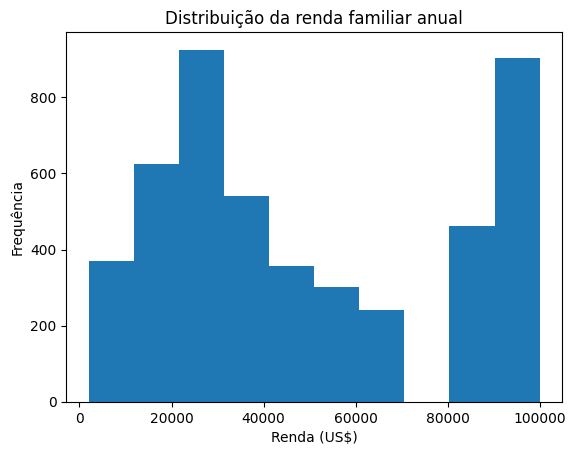

In [97]:
plt.hist(adult_nhanes_data['AnnualFamilyIncome'])
plt.title('Distribuição da renda familiar anual')
plt.xlabel('Renda (US$)')
plt.ylabel('Frequência')
plt.show()

Vamos realizar 5000 amostragens repetidas dessa variável e então examinar a distribuição amostral das médias. Para isso, vamos construir uma função que executa a amostragem e retorna o valopr da renda média.

In [98]:
def amostragem_retorna_media(dados, nome_variavel,
                             tamanho_amostra=250, amostragens=5000):
    """
    Toma amostras repetidas de uma variável que é parte de um DataFrame e
    calcula a média dessa variável.

    Parâmetros:
    -----------
    dados: DataFrame que contém os dados do experimento
    nome_variavel: coluna do DataFrame a ser analisada
    tamanho_amostra: número de observações em cada amostragem
    amostragens: núemro de amostragens desejado

    Reterno:
    --------
    dist_amostral: DataFrame contendo as médias de cada amostragem
    """
    dist_amostral = pd.DataFrame({'média': np.zeros(amostragens)})
    for amostragem in range(amostragens):
        amostra_df = dados.sample(tamanho_amostra)
        dist_amostral.loc[amostragem, 'média'] = amostra_df[nome_variavel].mean()
    return(dist_amostral)

Agora, usando a função `amostragem_retorna_media()`, vamos calcular a distribuição amostral para a renda familiar anual e plotar seu histograma.

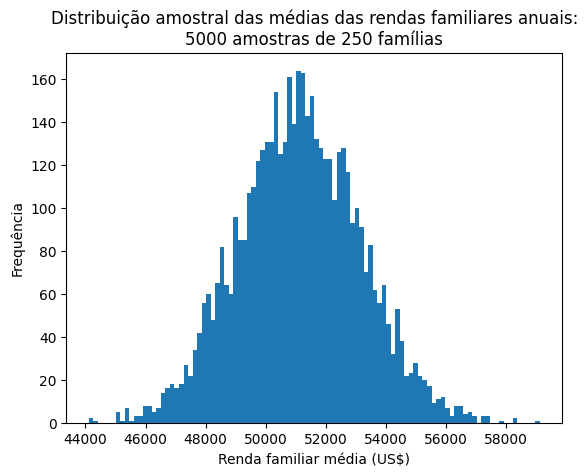

In [99]:
adult_income_data = adult_nhanes_data.dropna(subset=['AnnualFamilyIncome'])
dist_amostral_renda = amostragem_retorna_media(adult_income_data, 'AnnualFamilyIncome')
plt.hist(dist_amostral_renda['média'], 100)
plt.title('Distribuição amostral das médias das rendas familiares anuais:\n5000 amostras de 250 famílias')
plt.xlabel('Renda familiar média (US$)')
plt.ylabel('Frequência')
plt.show()

O histograma indica que a distribuição se aproxima bastante de um normal. Para nos certificar disso, vamos usar gráficos QQ. No gráfico da esquerda, temos a representação da distribuição original das rendas familiares anuais; no gráfico da direita, usamos a distribuição amostral das rendas médias.

In [100]:
# Biblioteca
from scipy.stats import probplot

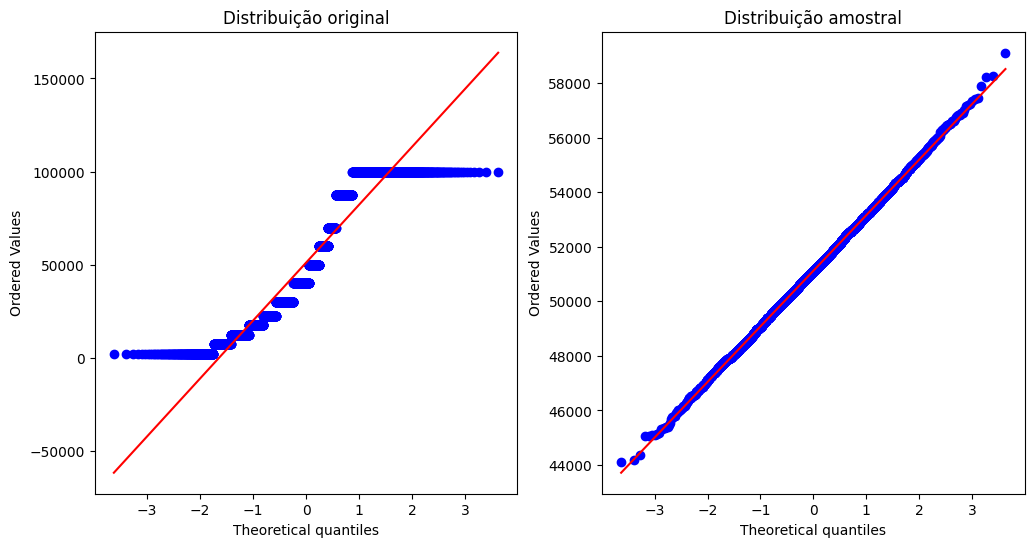

In [102]:
# Gráfico QQ - Distribuição original de renda familiar anual
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
probplot(adult_income_data['AnnualFamilyIncome'], plot=sns.mpl.pyplot)
plt.title('Distribuição original')

# Gráfico QQ - Distribuição amostral das rendas familiares anuais médias
plt.subplot(1, 2, 2)
probplot(dist_amostral_renda['média'], plot=sns.mpl.pyplot)
plt.title('Distribuição amostral')
plt.show()

Dos gráficos anteriores podemos afirmar que os dados oroginais de renda familiar anual são altamente anormais. Isso é evidenciado pelo fato de que os valores dos dados divergem muito da linha unitária vermelha. Por outro lado, a distribuição amostral das rendas familiares anuais médias é muito próxima de uma distribuição normal.